# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



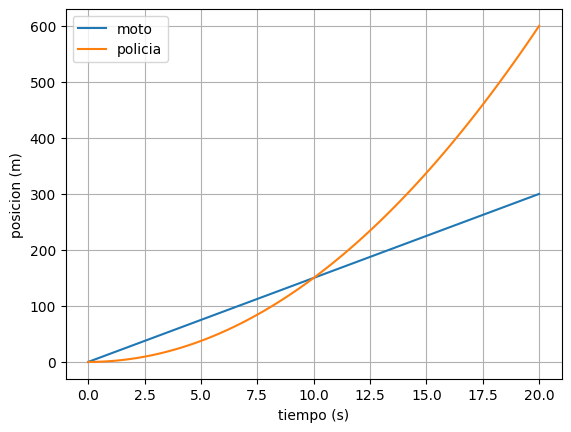

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def moto(v, t):
  x_m = v*t
  return x_m

def poli(a, t):
  x_p= 0.5*a*(t**2)
  return x_p

time= np.linspace(0, 20, 101)

plt.plot(time, moto(15,time), label='moto')
plt.plot(time, poli(3, time), label='policia')
plt.xlabel('tiempo (s)')
plt.ylabel('posicion (m)')
plt.legend()
plt.grid()
plt.show()

---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




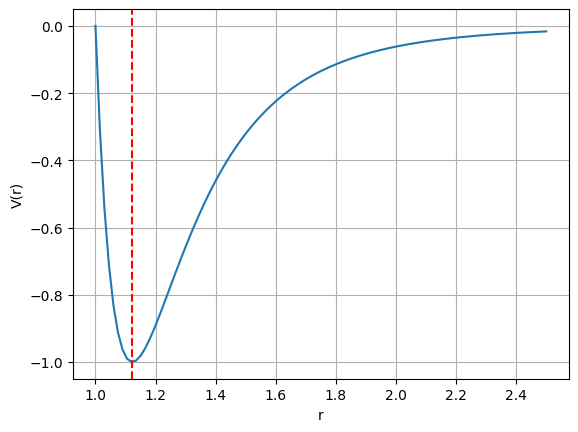

In [ ]:
def LJ(r):
  sigma=1
  epsilon=1
  V= 4*epsilon*(((sigma/r)**12)-(sigma/r)**6)
  return V

r=np.linspace(1, 2.5, 101)
plt.plot(r, LJ(r))
plt.xlabel('r')
plt.ylabel('V(r)')
plt.grid()
plt.axvline(2**(1/6), color='r', linestyle='--')

plt.show()

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [ ]:

url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"


html_content = pd.read_html(url)
alturas = html_content[0]


alturas



,Unnamed: 0,Country,"Average Height, Boys, 19 yo (cm)↓",Girls 19 (cm),Boys 19 (in),Girls 19 (in)
0,NaN,Netherlands,184,170,6 ft.,5 ft. 7 in.
1,NaN,Montenegro,183,170,6 ft.,5 ft. 7 in.
2,NaN,Estonia,183,169,6 ft.,5 ft. 6 in.
3,NaN,Bosnia and Herzegovina,182,167,6 ft.,5 ft. 6 in.
4,NaN,Iceland,182,169,6 ft.,5 ft. 7 in.
...,...,...,...,...,...,...
191,NaN,Papua New Guinea,163,157,5 ft. 4 in.,5 ft. 2 in.
192,NaN,Solomon Islands,163,157,5 ft. 4 in.,5 ft. 2 in.
193,NaN,Laos,163,153,5 ft. 4 in.,5 ft.
194,NaN,Timor-Leste,160,153,5 ft. 3 in.,5 ft.


In [ ]:
import pandas as pd

# Cargar los datos
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"
html_content = pd.read_html(url)
alturas = html_content[0]

# 1. Eliminar columnas con medidas en pulgadas ("in")
columnas_a_eliminar = [col for col in alturas.columns if "in" in str(col).lower()]
alturas = alturas.drop(columns=columnas_a_eliminar, errors='ignore')

alturas = alturas.dropna(axis=1, how='all')

#creamos un diccionario que nos permita traducir nombres:
nombres_espanol = {
    "Country": "país",
    "Average Height, Boys, 19 yo (cm)↓": "altura media masculina de 19 años (cm)",
    "Girls 19 (cm)": "altura media femenina de 19 años"
}

alturas = alturas.rename(columns=nombres_espanol)

alturas

,país,altura media masculina de 19 años (cm),altura media femenina de 19 años
0,Netherlands,184,170
1,Montenegro,183,170
2,Estonia,183,169
3,Bosnia and Herzegovina,182,167
4,Iceland,182,169
...,...,...,...
191,Papua New Guinea,163,157
192,Solomon Islands,163,157
193,Laos,163,153
194,Timor-Leste,160,153


In [ ]:
alturas_masc = alturas.sort_values(by = 'altura media masculina de 19 años (cm)', ascending=False)
#alturas
alturas_fem = alturas.sort_values(by = 'altura media femenina de 19 años', ascending=False)

top10_alturas_masc= alturas_masc.head(10)
top10_alturas_fem= alturas_fem.head(10)

late_alturas_masc = alturas_masc.tail(10)
late_alturas_fem = alturas_fem.tail(10)

late_alturas_masc_col = pd.concat([late_alturas_masc, alturas.loc[alturas['país'] == 'Colombia']])
late_alturas_fem_col = pd.concat([late_alturas_fem, alturas.loc[alturas['país'] == 'Colombia']])

top10_alturas_masc_col = pd.concat([top10_alturas_masc, alturas.loc[alturas['país'] == 'Colombia']])
top10_alturas_masc_col

top10_alturas_fem_col = pd.concat([top10_alturas_fem, alturas.loc[alturas['país'] == 'Colombia']])
top10_alturas_fem_col


,país,altura media masculina de 19 años (cm),altura media femenina de 19 años
0,Netherlands,184,170
1,Montenegro,183,170
2,Estonia,183,169
4,Iceland,182,169
7,Latvia,181,169
5,Denmark,182,169
13,Lithuania,181,168
6,Czech Republic,181,168
43,American Samoa,177,168
12,Serbia,181,168


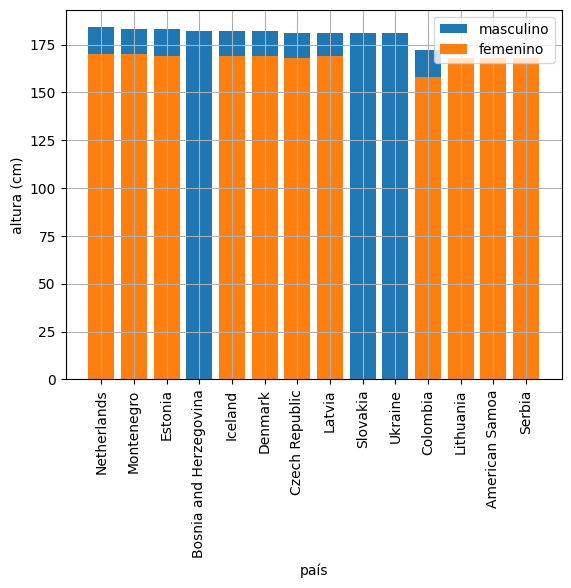

In [ ]:
plt.bar(top10_alturas_masc_col['país'], top10_alturas_masc_col['altura media masculina de 19 años (cm)'])
plt.bar(top10_alturas_fem_col['país'], top10_alturas_fem_col['altura media femenina de 19 años'])
plt.xlabel('país')
plt.ylabel('altura (cm)')
plt.legend(['masculino', 'femenino'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

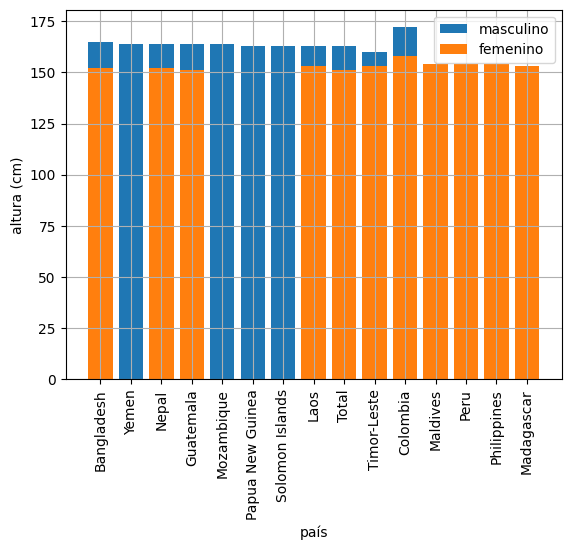

In [ ]:
plt.bar(late_alturas_masc_col['país'], late_alturas_masc_col['altura media masculina de 19 años (cm)'])
plt.bar(late_alturas_fem_col['país'], late_alturas_fem_col['altura media femenina de 19 años'])
plt.xlabel('país')
plt.ylabel('altura (cm)')
plt.legend(['masculino', 'femenino'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
nombres_espanol = {
    "Country": "país",
    "Average Height, Boys, 19 yo (cm)↓": "altura media masculina de 19 años (cm)",
    "Girls 19 (cm)": "altura media femenina de 19 años"
}

income = income.rename(columns=nombres_espanol)
income = income.dropna(axis=1, how='all')
#html_content

In [ ]:
income

,país,Wealth per Adult 2022↓,GDP per Adult 2022,Total Wealth 2022,Share of World Wealth 2022
0,Switzerland,"$685,226","$120,431",$4.8T,1.1%
1,Luxembourg,"$585,950","$163,432",$299B,0.1%
2,United States,"$551,347","$100,380",$139.9T,30.8%
3,Hong Kong,"$551,194","$57,168",$3.5T,0.8%
4,Iceland,"$498,290","$102,597",$129B,NaN
...,...,...,...,...,...
215,Anguilla,NaN,"$32,835",NaN,NaN
216,Cook Islands,NaN,"$29,907",NaN,NaN
217,Nauru,NaN,"$23,044",NaN,NaN
218,Tuvalu,NaN,"$7,773",NaN,NaN


In [ ]:
altos_plata_masc = pd.merge(top10_alturas_masc_col, income, on='país')
altos_plata_masc



bajos_plata_masc = pd.merge(late_alturas_masc_col, income, on='país')
bajos_plata_masc



,Unnamed: 0_x,país,altura media masculina de 19 años (cm),altura media femenina de 19 años,Unnamed: 0_y,Wealth per Adult 2022↓,GDP per Adult 2022,Total Wealth 2022,Share of World Wealth 2022
0,NaN,Bangladesh,165,152,NaN,"$9,796","$3,644",$1.1T,0.2%
1,NaN,Yemen,164,155,NaN,"$6,492","$1,271",$105B,NaN
2,NaN,Nepal,164,152,NaN,"$4,672","$1,912",$90B,NaN
3,NaN,Guatemala,164,151,NaN,NaN,"$8,970",NaN,NaN
4,NaN,Mozambique,164,155,NaN,"$1,353","$1,179",$21B,NaN
5,NaN,Papua New Guinea,163,157,NaN,"$8,606","$6,097",$45B,NaN
6,NaN,Solomon Islands,163,157,NaN,"$11,660","$4,557",$4B,NaN
7,NaN,Laos,163,153,NaN,"$6,191","$2,997",$28B,NaN
8,NaN,Timor-Leste,160,153,NaN,NaN,"$2,779",NaN,NaN
9,NaN,Colombia,172,158,NaN,"$15,464","$8,230",$564B,0.1%


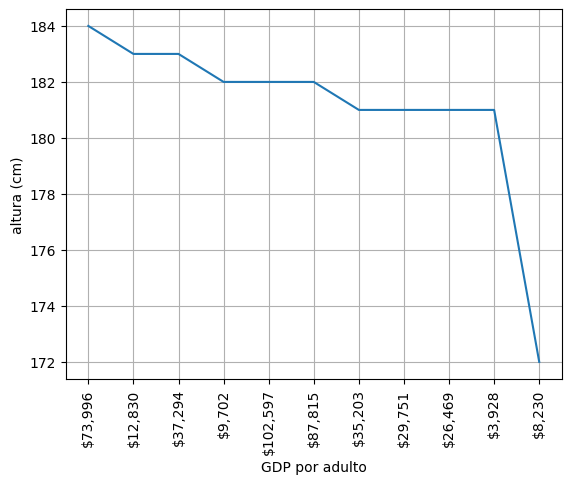

In [ ]:
plt.plot(altos_plata_masc['GDP per Adult 2022'], top10_alturas_masc_col['altura media masculina de 19 años (cm)'])
#plt.bar(late_alturas_fem_col['país'], late_alturas_fem_col['altura media femenina de 19 años'])
plt.xlabel("GDP por adulto")
plt.ylabel('altura (cm)')
#plt.legend(['masculino', 'femenino'])
plt.xticks(rotation=90)

plt.grid()
plt.show()

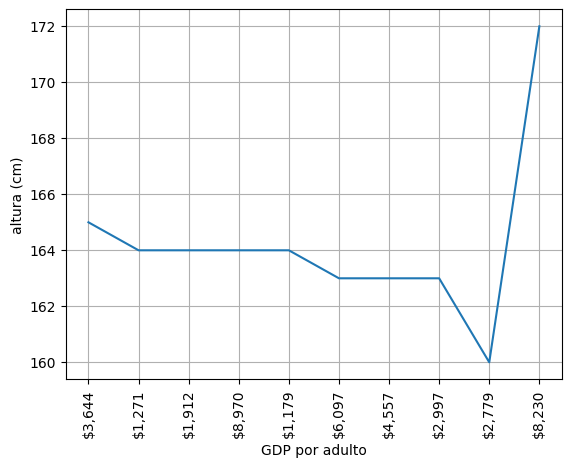

In [ ]:
plt.plot(bajos_plata_masc['GDP per Adult 2022'], bajos_plata_masc['altura media masculina de 19 años (cm)'])
#plt.bar(late_alturas_fem_col['país'], late_alturas_fem_col['altura media femenina de 19 años'])
plt.xlabel("GDP por adulto")
plt.ylabel('altura (cm)')
#plt.legend(['masculino', 'femenino'])
plt.xticks(rotation=90)

plt.grid()
plt.show()